In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [11]:
data = pd.read_csv('data/winequality-red.csv')

data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
#Remapping quality target column 0 to 5

mapping = {
    3 : 0,
    4 : 1,
    5 : 2,
    6 : 3,
    7 : 4,
    8 : 5
}

data.loc[:, "quality"] = data.quality.map(mapping)

data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [13]:
len(data)

1599

In [14]:
#Splitting data into training and validation

df = data.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [18]:
#Will use all but last column of dataframe
cols = list(df.columns[0:len(df.columns)-1])
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

<function matplotlib.pyplot.show(close=None, block=None)>

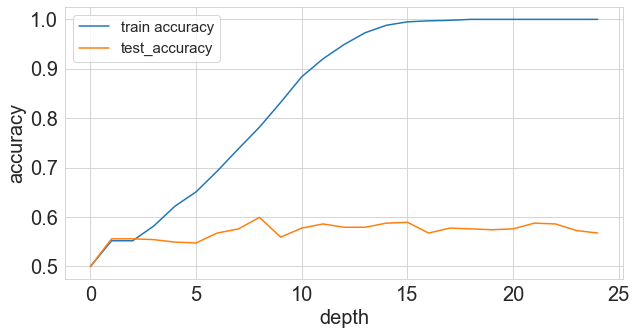

In [21]:
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range (1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    #fit model 
    clf.fit(df_train[cols], df_train.quality)

    #predictions
    train_pred = clf.predict(df_train[cols])
    test_pred = clf.predict(df_test[cols])

    #Accuracy
    train_accuracy = metrics.accuracy_score(df_train.quality, train_pred)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

#Plotting

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test_accuracy")
plt.legend(loc="upper left", prop= {'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("depth" , size = 20)
plt.ylabel("accuracy" , size = 20)
plt.show
